In [1]:
import numpy as np
import pylab as plt
import scipy as sc
import yaml as yaml
import pickle as pickle
import networkx as nx
import os as os

from NAQ_graphs import NAQ
from graph_generator import generate_graph

%matplotlib notebook

graph_tpe = 'SM'
params = yaml.load(open('graph_params.yaml','rb'))[graph_tpe]

G, pos  = generate_graph(tpe=graph_tpe, params = params)

if not os.path.isdir(graph_tpe):
    os.mkdir(graph_tpe)
    
os.chdir(graph_tpe)

<IPython.core.display.Javascript object>


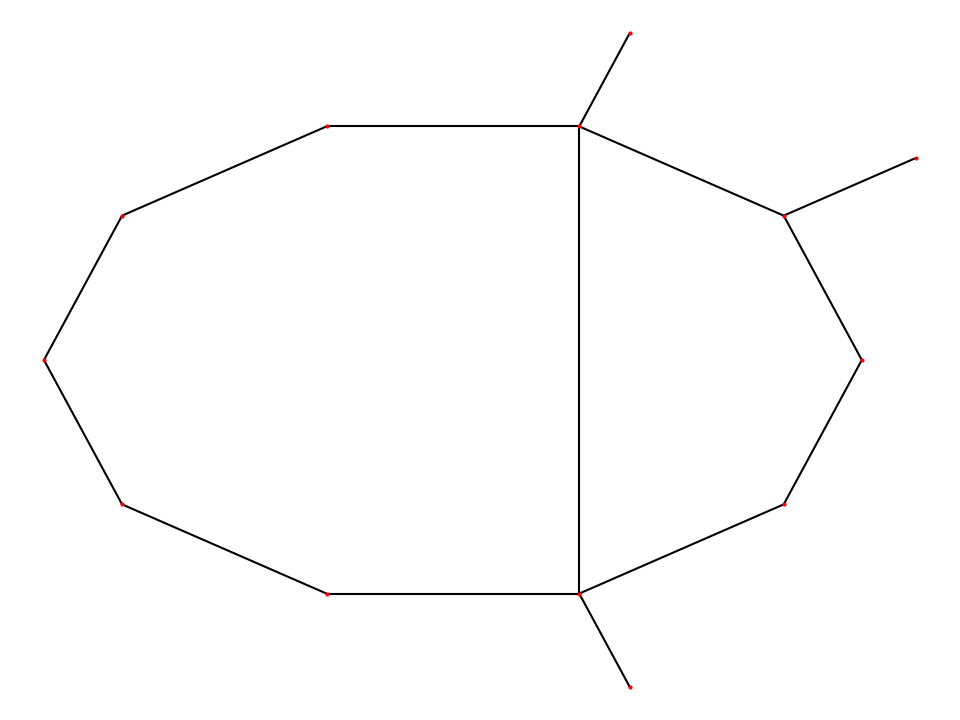

In [2]:
%matplotlib notebook

plt.figure()
nx.draw(G,pos=pos,node_size=1)

In [3]:
chi = np.array([ 1.j for i in range(len(G.edges))])

naq_u1 = NAQ(G, positions = pos, chi = chi, group = 'U1', open_graph = True)
naq_u1.n_processes_scan = 4 #number of CPU to use

naq_u1.set_chi((1.+1.j)*naq_u1.chi0)

naq_u1.update_laplacian()

In [4]:

modes = pickle.load(open('modes.pkl', 'rb'))
Ks, Alphas, s = pickle.load( open('scan.pkl', 'rb'))

<IPython.core.display.Javascript object>


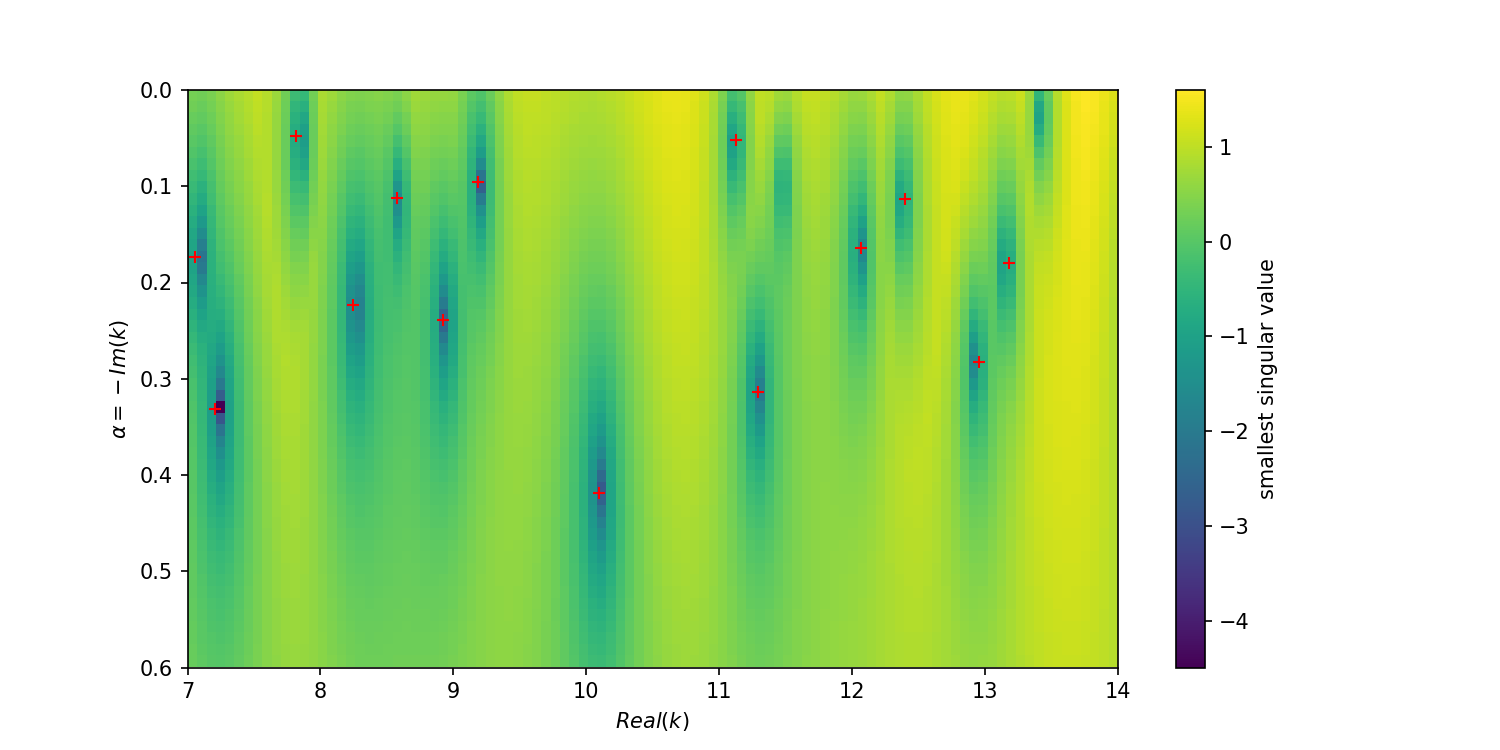

In [5]:
naq_u1.plot_scan(Ks,Alphas,s,modes)


In [6]:
#pump parameters (see papers)
naq_u1.pump_params = {}
naq_u1.pump_params['gamma_perp'] = 1.
naq_u1.pump_params['k_a']        = 10.
naq_u1.pump_params['D0']         = 0 
naq_u1.pump_params['edges']      = [0, 1, 2,]  #edges to pump

m = 0
naq_u1.update_chi(modes[m])
print("condition number no pump:", naq_u1.test_laplacian())

naq_u1.pump_params['D0']         = 1e-2
naq_u1.update_chi(modes[m])
print("condition number with pump:", naq_u1.test_laplacian())


condition number no pump: 4.9696755e-05
condition number with pump: 0.08218209


In [7]:
#find the pump trajectories
params['s_size']    = 1e-2*np.asarray([1.,1.])

#the correct balaance between s_size and the D0 steps must be found for each graph/pump
D0_max = .1

%time new_modes = naq_u1.pump_trajectories(modes, params, D0_max = D0_max, D0_steps = 20)

D0: 0.005263157894736842
D0: 0.010526315789473684
D0: 0.015789473684210527
D0: 0.021052631578947368
D0: 0.02631578947368421
D0: 0.031578947368421054
D0: 0.03684210526315789
D0: 0.042105263157894736
D0: 0.04736842105263158
D0: 0.05263157894736842
D0: 0.05789473684210526
D0: 0.06315789473684211
D0: 0.06842105263157895
D0: 0.07368421052631578
D0: 0.07894736842105263
Could not update a mode, use smaller D0 steps!
D0: 0.08421052631578947
D0: 0.08947368421052632
Could not update a mode, use smaller D0 steps!
D0: 0.09473684210526316
D0: 0.1
Could not update a mode, use smaller D0 steps!
CPU times: user 2.27 s, sys: 371 ms, total: 2.64 s
Wall time: 1min 12s


<IPython.core.display.Javascript object>


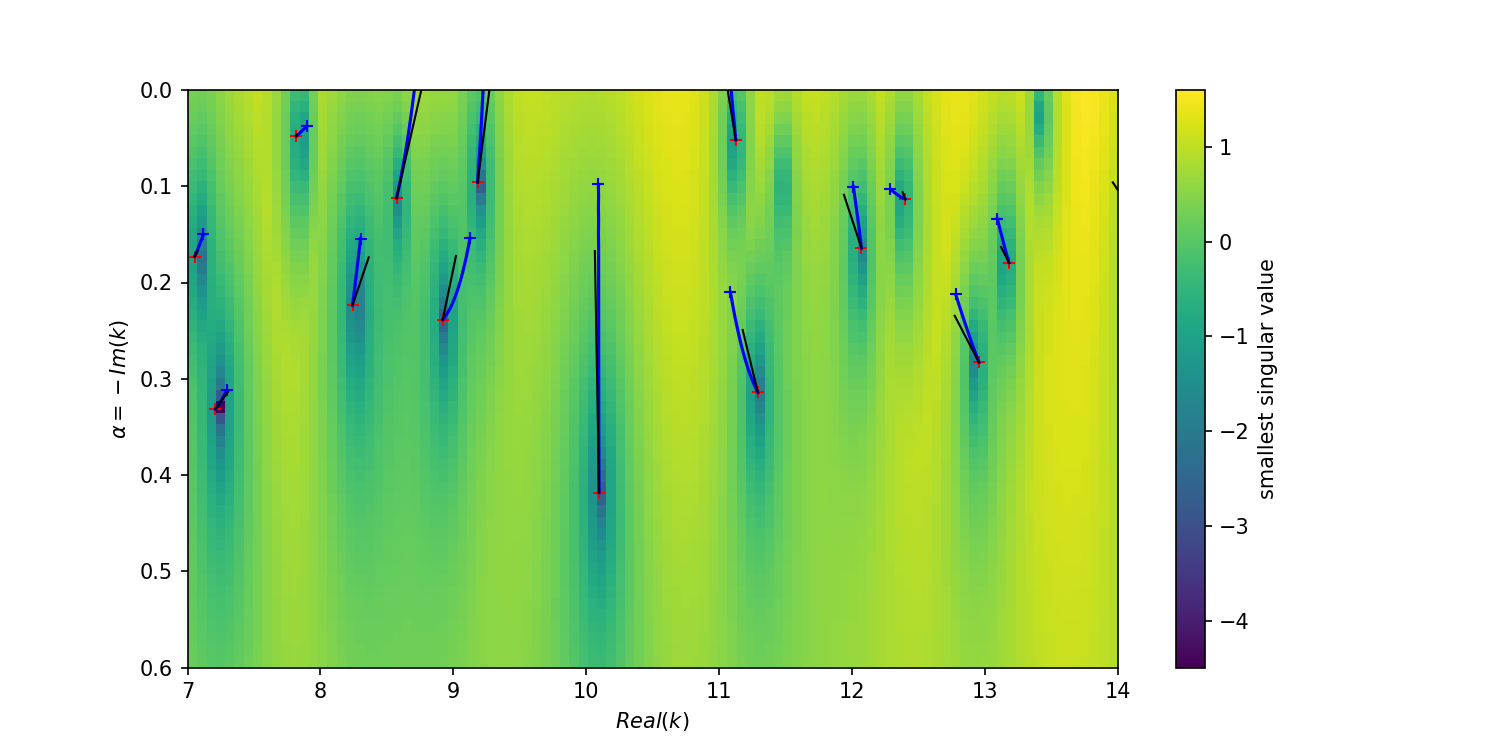

In [8]:

naq_u1.plot_pump_traj(Ks, Alphas, s, modes, new_modes)
